In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('netflix_titles.csv')

# Netflix Dataset Analysis

### 1. Data Exploration

#### Questions:
1. What does the dataset look like? (View the first few rows)
2. What are the data types of each column?
3. Are there any missing values in the dataset?

### 2. Data Cleaning

#### Questions:
1. How many missing values are there in each column?
2. How should missing values be handled in each column (e.g., remove rows, fill with default values)?
3. Are the data types for each column appropriate? If not, how can they be corrected?

### 3. Descriptive Statistics

#### Questions:
1. How many movies and TV shows are there in the dataset?
2. What is the distribution of release years for movies and TV shows?
3. What are the most common genres/tags in the dataset?

### 4. Visualizations

#### Questions:
1. How can we visualize the number of movies vs. TV shows?
2. What is the distribution of content ratings (e.g., PG, PG-13, R) in the dataset?
3. What are the most frequent genres/tags and how can we visualize them?

### 5. Trend Analysis

#### Questions:
1. How has the number of movies and TV shows added to Netflix changed over the years?
2. Which genres/tags have become more or less popular over time?

### 6. Top Directors/Actors

#### Questions:
1. Who are the most prolific directors in the dataset?
2. Which actors appear most frequently in the dataset?

### 7. Duration Analysis

#### Questions:
1. What is the distribution of movie durations?
2. How many seasons do TV shows typically have?

### 8. Correlation Analysis

#### Questions:
1. Is there a correlation between the release year and the duration of movies?
2. Is there a correlation between content rating and duration?


### 1. Data Exploration

#### Questions:
1. What does the dataset look like? (View the first few rows)
2. What are the data types of each column?
3. Are there any missing values in the dataset?

In [3]:
data['date_added'] = data['date_added'].astype('datetime64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2. Data Cleaning

#### Questions:
1. How many missing values are there in each column?
2. How should missing values be handled in each column (e.g., remove rows, fill with default values)?
3. Are the data types for each column appropriate? If not, how can they be corrected?

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)

In [7]:
data = data.dropna(subset=['date_added', 'rating', 'duration'])

### 3. Descriptive Statistics

#### Questions:
1. How many movies and TV shows are there in the dataset?
2. What is the distribution of release years for movies and TV shows?
3. What are the most common genres/tags in the dataset?
4. What is the distribution of content ratings (e.g., PG, PG-13, R) in the dataset?

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.color_palette("husl", 3)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

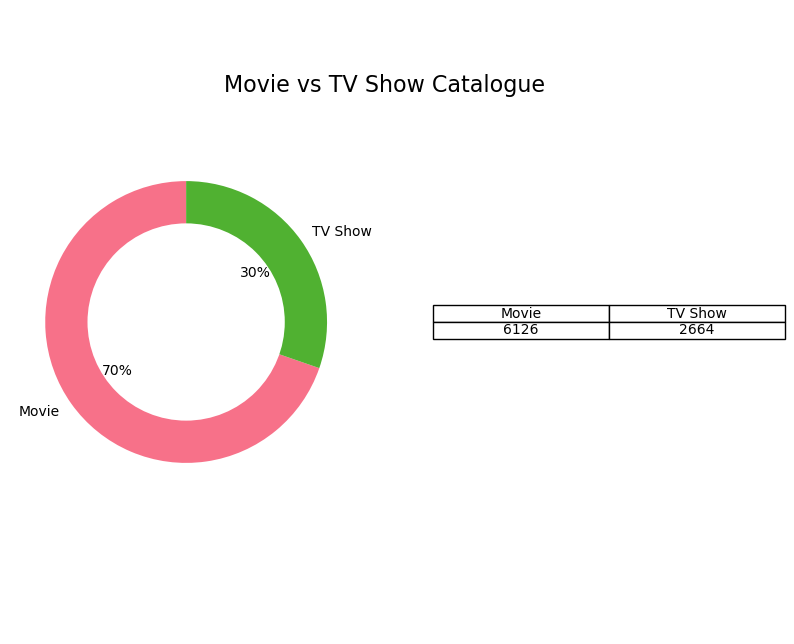

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

pie = data.groupby('type')[['title']].count()

ax1.pie(
    x=pie['title'],
    startangle=90,
    labels=pie.index,
    autopct='%0.f%%',
    colors=sns.color_palette("husl", 3)
)

donut = plt.Circle((0, 0), 0.7, fc='white')
ax1.add_artist(donut)

table_data = [['Movie', 'TV Show'], pie['title'].values]

table = ax2.table(
    cellText=table_data,
    cellLoc='center',
    loc='center'
)

ax2.axis('off')

plt.subplots_adjust(hspace=0.1, bottom = 0.1)

fig.suptitle('Movie vs TV Show Catalogue', fontsize=16, y=0.8)

plt.show()


[Text(0.5, 0, 'Movie/TV Show'), Text(0, 0.5, 'Count')]

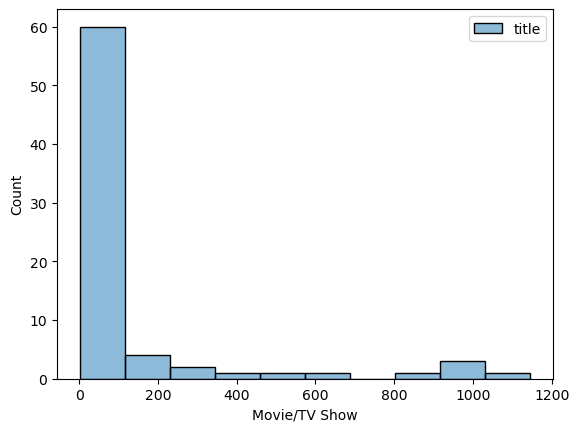

In [11]:
sns.histplot(
    data.groupby('release_year')[['title']].count(),
    bins = 10, kde = False).set(xlabel = 'Movie/TV Show', ylabel = 'Count')

[Text(0.5, 1.0, 'Yearly Release Count'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

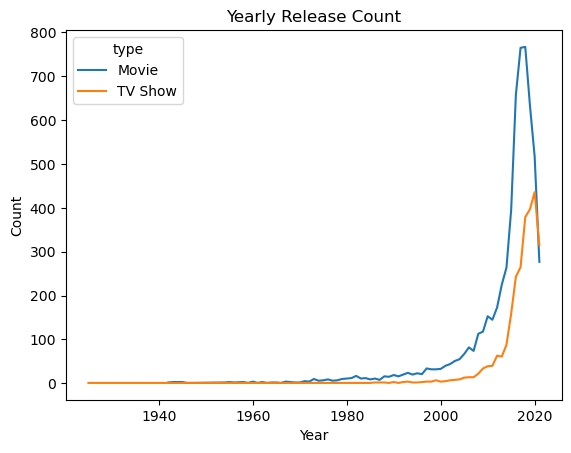

In [12]:
sns.lineplot(
    x = 'release_year',
    y = 'title',
    data = data.groupby(['type', 'release_year'])[['title']].count(),
    hue = 'type'
).set(title = 'Yearly Release Count', xlabel = 'Year', ylabel = 'Count')

In [13]:
tags = data['listed_in'].str.split(', ')
tags = tags.explode()
popular_tags = tags.value_counts().reset_index()

[Text(0.5, 1.0, 'Popular Tags'), Text(0.5, 0, 'Count'), Text(0, 0.5, 'Tags')]

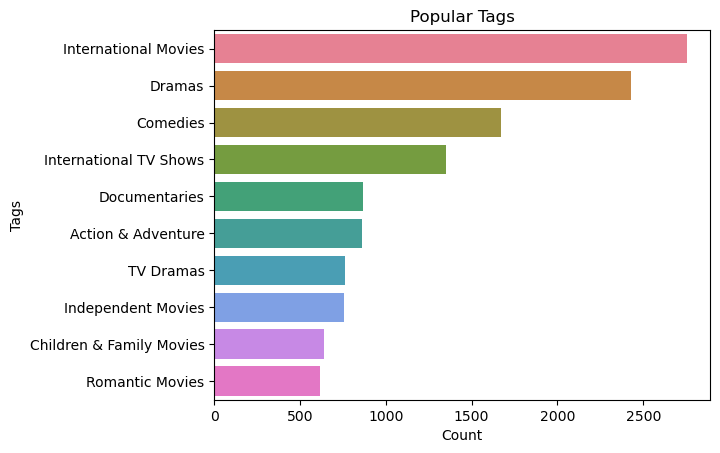

In [14]:
sns.barplot(
    x = 'listed_in',
    y = 'index',
    data = popular_tags.head(10),
    palette = sns.color_palette("husl", 10)
).set(title = 'Popular Tags', xlabel = 'Count', ylabel= 'Tags')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'G'),
  Text(1, 0, 'NC-17'),
  Text(2, 0, 'NR'),
  Text(3, 0, 'PG'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'R'),
  Text(6, 0, 'TV-14'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-MA'),
  Text(9, 0, 'TV-PG'),
  Text(10, 0, 'TV-Y'),
  Text(11, 0, 'TV-Y7'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'UR')])

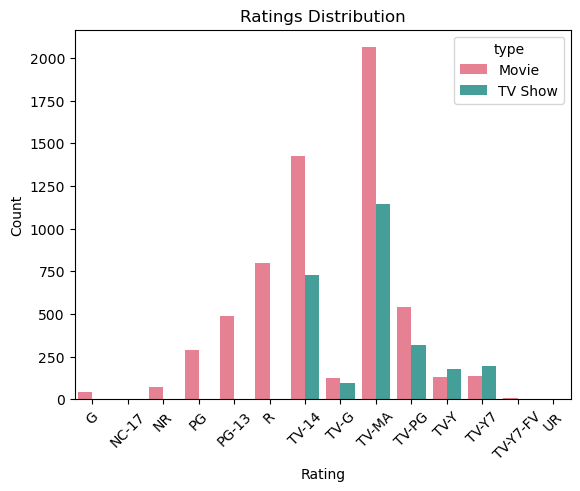

In [15]:
sns.barplot(
    x='rating',
    y='title',
    data=data.groupby(['type', 'rating'])[['title']].count().reset_index(),
    hue='type',
    palette=sns.color_palette("husl", 2)
).set(title='Ratings Distribution', xlabel='Rating', ylabel='Count')
plt.xticks(rotation=45)

In [16]:
data.groupby(['type', 'rating'])[['title']].count()

title
type    rating         
Movie   G            41
        NC-17         3
        NR           75
        PG          287
        PG-13       490
        R           797
        TV-14      1427
        TV-G        126
        TV-MA      2062
        TV-PG       540
        TV-Y        131
        TV-Y7       139
        TV-Y7-FV      5
        UR            3
TV Show NR            4
        R             2
        TV-14       730
        TV-G         94
        TV-MA      1143
        TV-PG       321
        TV-Y        175
        TV-Y7       194
        TV-Y7-FV      1

### 5. Trend Analysis

#### Questions:
1. How has the number of movies and TV shows added to Netflix changed over the years?
2. Which genres/tags have become more or less popular over time?

In [17]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
data['year_added'] = data['date_added'].dt.year

[Text(0.5, 1.0, 'Yearly Added Count'),
 Text(0.5, 0, 'Year Added'),
 Text(0, 0.5, 'Count')]

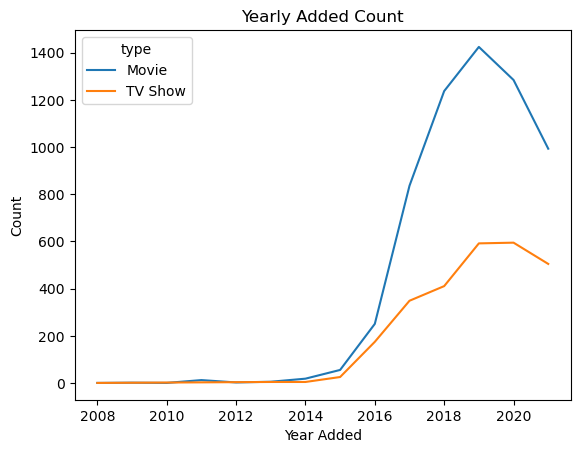

In [19]:
sns.lineplot(
    x = 'year_added',
    y = 'title',
    data = data.groupby(['type', 'year_added'])[['title']].count(),
    hue = 'type'
).set(title = 'Yearly Added Count', xlabel = 'Year Added', ylabel = 'Count')

In [20]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [21]:
other_tag_df = data[['listed_in', 'year_added']]
other_tag_df

,listed_in,year_added
0,Documentaries,2021
1,"International TV Shows, TV Dramas, TV Mysteries",2021
2,"Crime TV Shows, International TV Shows, TV Act...",2021
3,"Docuseries, Reality TV",2021
4,"International TV Shows, Romantic TV Shows, TV ...",2021
...,...,...
8802,"Cult Movies, Dramas, Thrillers",2019
8803,"Kids' TV, Korean TV Shows, TV Comedies",2019
8804,"Comedies, Horror Movies",2019
8805,"Children & Family Movies, Comedies",2020


In [22]:
exploded_listed_in = other_tag_df['listed_in'].str.split(', ').explode()
other_tags = pd.concat([exploded_listed_in, other_tag_df['year_added']], axis=1)
other_tags

,listed_in,year_added
0,Documentaries,2021
1,International TV Shows,2021
1,TV Dramas,2021
1,TV Mysteries,2021
2,Crime TV Shows,2021
...,...,...
8805,Children & Family Movies,2020
8805,Comedies,2020
8806,Dramas,2019
8806,International Movies,2019


In [23]:
another_tags_df = other_tags.value_counts().reset_index()

In [24]:
another_tags_df = another_tags_df.rename(columns = {0: 'Count'})
another_tags_df

,listed_in,year_added,Count
0,International Movies,2018,668
1,International Movies,2019,610
2,International Movies,2020,575
3,Dramas,2019,564
4,Dramas,2020,535
...,...,...,...
326,TV Mysteries,2013,1
327,Independent Movies,2008,1
328,International Movies,2009,1
329,International Movies,2011,1


In [25]:
another_tags_df.groupby(['listed_in', 'year_added'])[['Count']].sum()

Count
listed_in          year_added       
Action & Adventure 2014            1
                   2015            2
                   2016           18
                   2017           97
                   2018          173
...                              ...
Thrillers          2017           68
                   2018          111
                   2019          135
                   2020          133
                   2021          112

[331 rows x 1 columns]

In [26]:
trend_tags = another_tags_df.groupby(['listed_in', 'year_added'])[['Count']].sum()

In [27]:
top_tags = popular_tags['index'].head(10).to_list()
top_tags

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries',
 'Action & Adventure',
 'TV Dramas',
 'Independent Movies',
 'Children & Family Movies',
 'Romantic Movies']

In [28]:
trend_tags.query('listed_in in @top_tags and year_added > 2014')

Count
listed_in          year_added       
Action & Adventure 2015            2
                   2016           18
                   2017           97
                   2018          173
                   2019          202
...                              ...
TV Dramas          2017          130
                   2018          109
                   2019          164
                   2020          164
                   2021          137

[70 rows x 1 columns]

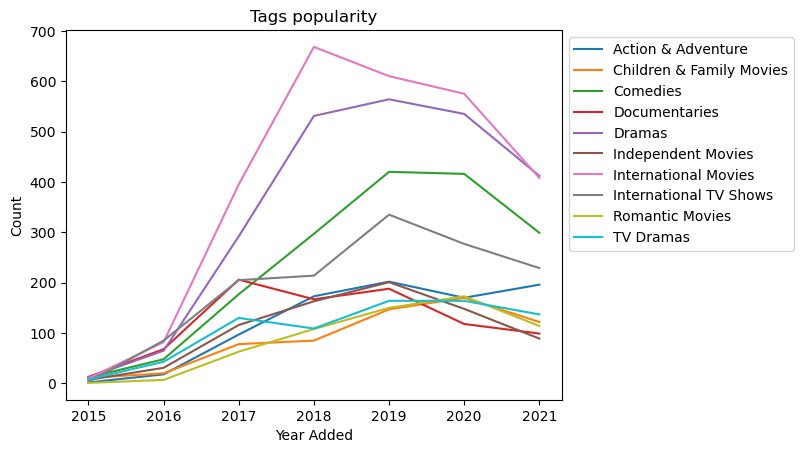

In [29]:
sns.lineplot(
    x = 'year_added',
    y = 'Count',
    data = trend_tags.query('listed_in in @top_tags and year_added > 2014'),
    hue = 'listed_in'
).set(title = 'Tags popularity', xlabel = 'Year Added', ylabel = 'Count')
plt.legend(bbox_to_anchor=(1, 1))

### 6. Top Directors/Actors

#### Questions:
1. Who are the most prolific directors in the dataset?
2. Which actors appear most frequently in the dataset?

In [30]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [31]:
data['director'].value_counts().iloc[1:11]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

In [32]:
exploded_cast = data['cast'].str.split(', ').explode()
exploded_cast.value_counts().iloc[1:11]

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

### 7. Duration Analysis

#### Questions:
1. What is the distribution of movie durations?
2. How many seasons do TV shows typically have?

In [33]:
data_movie = data.query('type == "Movie"')
data_tv = data.query('type == "TV Show"')

In [34]:
data_movie['duration'] = data_movie['duration'].str.replace(' min', '').astype(int)

C:\Users\bangg\AppData\Local\Temp\ipykernel_19144\1271276707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movie['duration'] = data_movie['duration'].str.replace(' min', '').astype(int)


[Text(0.5, 1.0, 'Duration Distribution'),
 Text(0.5, 0, 'Duration(Minute)'),
 Text(0, 0.5, 'Count')]

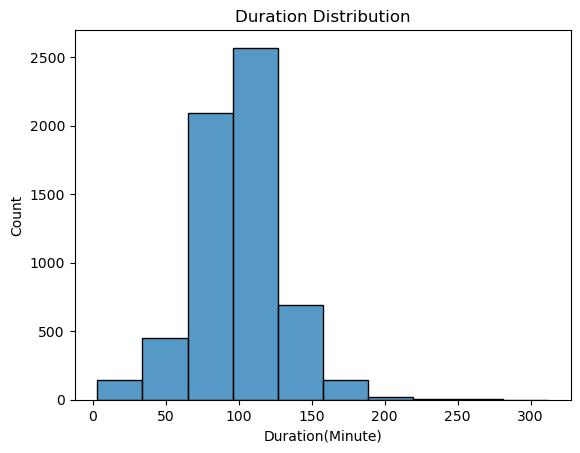

In [35]:
sns.histplot(
    data_movie['duration'],
    bins = 10, kde = False).set(title = 'Duration Distribution', xlabel = 'Duration(Minute)', ylabel = 'Count')

In [36]:
data_tv['duration'] = data_tv['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


C:\Users\bangg\AppData\Local\Temp\ipykernel_19144\153974044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tv['duration'] = data_tv['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


[Text(0.5, 1.0, 'Season Distribution'),
 Text(0.5, 0, 'Number of Seasons'),
 Text(0, 0.5, 'Count')]

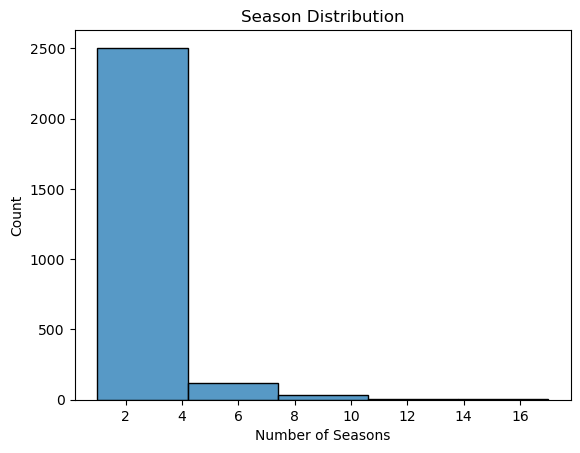

In [37]:
sns.histplot(
    data_tv['duration'],
    bins = 5, kde = False).set(title = 'Season Distribution', xlabel = 'Number of Seasons', ylabel = 'Count')

In [38]:
data_tv['duration'].mean()

1.7518768768768769

### 8. Correlation Analysis

#### Questions:
1. Is there a correlation between the release year and the duration of movies?
2. Is there a correlation between content rating and duration?

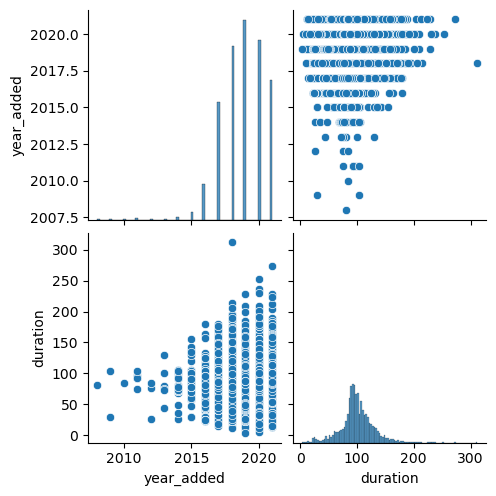

In [39]:
sns.pairplot(data_movie[['year_added', 'duration']])

In [40]:
encoded_ratings = pd.get_dummies(data_movie['rating'])
data_movies_encoded = pd.concat([data_movie, encoded_ratings], axis=1)

                 G     NC-17        NR        PG     PG-13         R  \
G         1.000000 -0.001817 -0.009139 -0.018198 -0.024203 -0.031744   
NC-17    -0.001817  1.000000 -0.002464 -0.004907 -0.006527 -0.008560   
NR       -0.009139 -0.002464  1.000000 -0.024682 -0.032827 -0.043055   
PG       -0.018198 -0.004907 -0.024682  1.000000 -0.065371 -0.085739   
PG-13    -0.024203 -0.006527 -0.032827 -0.065371  1.000000 -0.114030   
R        -0.031744 -0.008560 -0.043055 -0.085739 -0.114030  1.000000   
TV-14    -0.045235 -0.012198 -0.061352 -0.122175 -0.162488 -0.213116   
TV-G     -0.011895 -0.003208 -0.016133 -0.032128 -0.042729 -0.056042   
TV-MA    -0.058469 -0.015767 -0.079302 -0.157921 -0.210029 -0.275470   
TV-PG    -0.025522 -0.006882 -0.034615 -0.068932 -0.091677 -0.120241   
TV-Y     -0.012134 -0.003272 -0.016457 -0.032773 -0.043587 -0.057167   
TV-Y7    -0.012507 -0.003373 -0.016964 -0.033781 -0.044928 -0.058926   
TV-Y7-FV -0.002346 -0.000633 -0.003182 -0.006336 -0.008427 -0.01

Text(0.5, 1.0, 'Correlation Between Content Ratings and Duration')

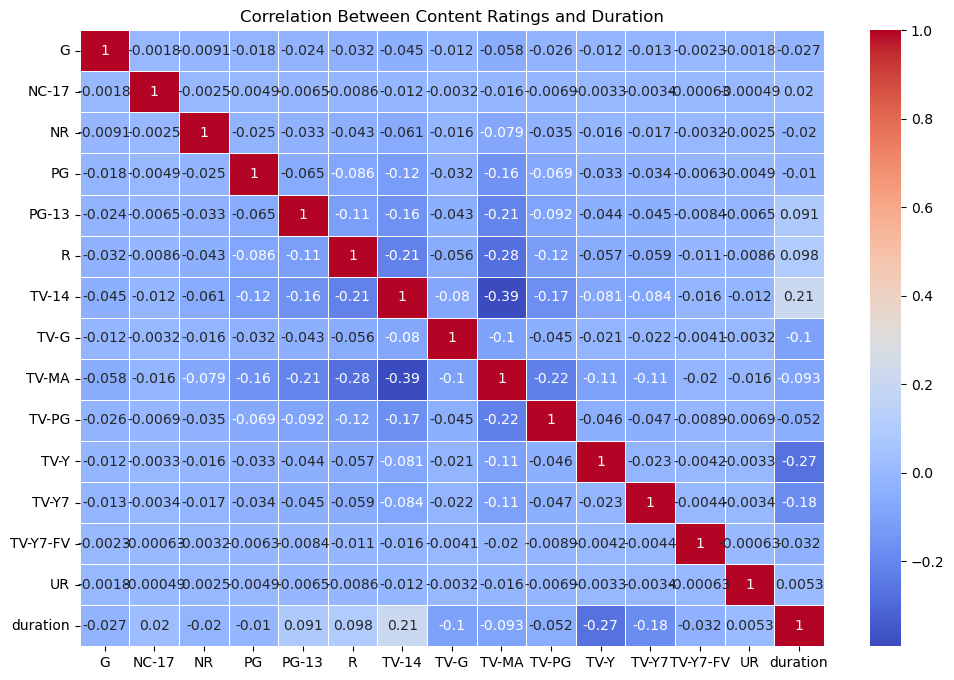

In [41]:
rating_columns = encoded_ratings.columns
numerical_data = data_movies_encoded[rating_columns].join(data_movies_encoded['duration'])

correlation_matrix = numerical_data.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Content Ratings and Duration')

